# Week 8 Jupyter Notebook
### Date: October 20, 2025
### By: Suzanne Fernandes-Sindi

This notebook contains code you might find helpful in Week 8. 


### Question 1: Random Number Generator.

In [1]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate 3 random numbers between 0 and 1
u = np.random.rand(3)

# Print rounded to two significant figures
print("Random uniform samples (rounded):", [round(x, 2) for x in u])


Random uniform samples (rounded): [0.37, 0.95, 0.73]


### Question 2: Continuous Distribution Transformation Check: Squaring an Exponential RV

**Objective:** Compare your hand-derived PDF and CDF for \(Y = X^2\), where \(X \sim \mathrm{Exp}(\lambda)\), against a computer simulation.  

---

## Instructions

1. **Simulation**
    - The computer will generate `n_samples` random draws from an exponential distribution with a fixed `lambda_param`.  
    - Each simulated `X` is squared to produce `Y = X^2`.  

2. **Empirical Plots**
    - A histogram of the `Y` values will show the empirical PDF (**blue**).  
    - A bar plot of the cumulative counts will show the empirical CDF (**blue**).  

3. **Your Functions**
    - There are placeholders for you to define your own PDF and CDF formulas:  

    ```python
    f_Y_student = lambda y: ...  # your PDF for Y
    F_Y_student = lambda y: ...  # your CDF for Y
    ```
    - You can change `lambda_param` to explore different exponential rates.  
    - Your formulas will be plotted as **red dashed lines** to check visually against the simulation.  

4. **Plotting Grid**
    - The x-axis of the plots is limited to the 95th percentile of `Y` to avoid extreme outliers.  
    - This makes it easier to see how well your formulas match the empirical results.  

5. **Goal**
    - The exercise is to verify that your hand-derived PDF and CDF match the simulated data.  
    - **Do not use the theoretical formula provided in the solution**; instead, enter your own derivation.  


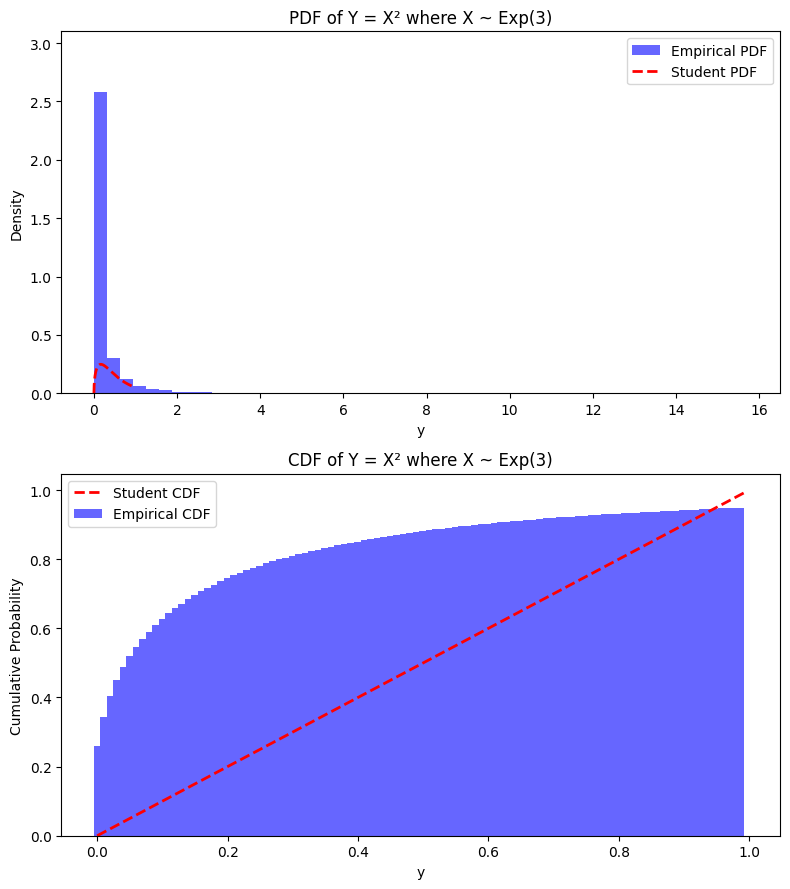

In [13]:
# ---------------------------------
# Squaring an Exponential Random Variable with Empirical PDF/CDF
# ---------------------------------

import random
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Simulation parameters
# -----------------------------
n_samples = 100000
lambda_param = 3  # fixed lambda <--- CHANGE THIS VALUE
X_values = []
Y_values = []

# -----------------------------
# Student Guess 
# Change your functions here. Helpful things 
# Exponentiate x: np.exp(x)
# Lambda parameter: lambda_param
# Square Root x: np.sqrt(x}
# -----------------------------
f_Y_student = lambda y: np.sqrt(y) * np.exp(-lambda_param * y)  #<---- Change This: Your PDF guess here.
F_Y_student = lambda y: y                                       #<---- Change This: Your CDF guess here.


# -----------------------------
# Generate exponential samples and compute Y = X^2
# -----------------------------
for i in range(n_samples):
    x = random.expovariate(lambda_param)
    y = x**2
    X_values.append(x)
    Y_values.append(y)

# -----------------------------
# Empirical histogram for PDF
# -----------------------------
fig, axs = plt.subplots(2, 1, figsize=(8, 9))

counts, bins, patches = axs[0].hist(
    Y_values, bins=50, density=True, alpha=0.6, color='blue', label="Empirical PDF"
)

# -----------------------------
# Grid for plotting student PDF/CDF
# -----------------------------
y_min = min(Y_values)
y_max = (-np.log(0.05)/lambda_param)**2  # 95th percentile of Y
y_grid = np.linspace(y_min, y_max, 400)

# Evaluate student functions on grid
f_y_values = np.array([f_Y_student(y) for y in y_grid])
F_y_values = np.array([F_Y_student(y) for y in y_grid])

# -----------------------------
# Plot PDF
# -----------------------------
axs[0].plot(y_grid, f_y_values, 'r--', linewidth=2, label="Student PDF")
axs[0].set_title("PDF of Y = X² where X ~ Exp({})".format(lambda_param))
axs[0].set_xlabel("y")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].set_ylim(0, 1.2*max(counts))

# -----------------------------
# Empirical CDF as bars
# -----------------------------
Y_sorted = np.sort(Y_values)
empirical_cdf = np.arange(1, n_samples + 1) / n_samples

# Bin width for CDF bars
bin_width = (y_max - y_min)/100
bins_cdf = np.arange(y_min, y_max + bin_width, bin_width)
cdf_counts, _ = np.histogram(Y_sorted, bins=bins_cdf)
cdf_cumulative = np.cumsum(cdf_counts) / n_samples

axs[1].bar(bins_cdf[:-1], cdf_cumulative, width=bin_width, alpha=0.6, color='blue', label="Empirical CDF")
axs[1].plot(y_grid, F_y_values, 'r--', linewidth=2, label="Student CDF")
axs[1].set_title("CDF of Y = X² where X ~ Exp({})".format(lambda_param))
axs[1].set_xlabel("y")
axs[1].set_ylabel("Cumulative Probability")
axs[1].legend()

plt.tight_layout()
plt.show()


### Question 3: Discrete Distribution Transformation Check: Minimum of 4 Dice.

**Objective:** Compare your hand-derived PDF (PMF) and CDF for the minimum of four fair dice against a computer simulation.

---

## Instructions

1. **Simulation**
    - The computer will simulate `n_trials` sets of four fair dice rolls.  
    - For each trial, it computes the minimum value of the four dice, `Y = min(X1, X2, X3, X4)`.

2. **Empirical Plots**
    - A bar plot of the relative frequencies will show the empirical PMF (**blue**).  
    - A bar plot of cumulative probabilities will show the empirical CDF (**blue**).  

3. **Your Functions**
    - There are placeholders for you to define your own PMF and CDF formulas:  

    ```python
    pmf_student = {k: ... for k in range(1,7)}  # your PMF for minimum
    F_student = {k: ... for k in range(1,7)}    # your CDF for minimum
    ```
    - Your formulas will be plotted as **red points or lines** to check visually against the simulation.  

4. **Plotting Grid**
    - The x-axis of the plots covers all possible outcomes of the minimum (1–6).  
    - This ensures the visualization matches the discrete nature of the random variable.

5. **Goal**
    - The exercise is to verify that your hand-derived PMF and CDF match the simulated data.  
    - You will enter your own derivation!

6. **Optional Exploration**
    - You can change the number of dice by adding more variables in the simulation loop or using a small list comprehension.  
    - Increasing `n_trials` will make the empirical results smoother and easier to compare with your formulas.


Empirical PMF:
  P(Y=1) ≈ 0.5218
  P(Y=2) ≈ 0.2825
  P(Y=3) ≈ 0.1347
  P(Y=4) ≈ 0.0487
  P(Y=5) ≈ 0.0116
  P(Y=6) ≈ 0.0007

Student PMF:
  P(Y=1) = 0.1667
  P(Y=2) = 0.1667
  P(Y=3) = 0.1667
  P(Y=4) = 0.1667
  P(Y=5) = 0.1667
  P(Y=6) = 0.1667


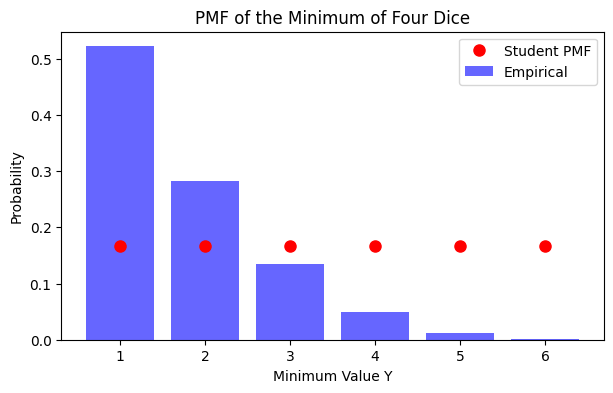

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Parameters
# ----------------------------
n_trials = 100000
min_values = []

# ----------------------------
# Step 2: Simulate rolls
# ----------------------------
for _ in range(n_trials):
    X1 = random.randint(1,6)
    X2 = random.randint(1,6)
    X3 = random.randint(1,6)
    X4 = random.randint(1,6)
    Y = min(X1, X2, X3, X4)
    min_values.append(Y)

# ----------------------------
# Step 3: Empirical PMF
# ----------------------------
unique, counts = np.unique(min_values, return_counts=True)
pmf_empirical = counts / n_trials

# ----------------------------
# Step 4: Student placeholder for theoretical PMF   <----- CHANGE THIS PART
# ----------------------------
# Students fill this in after deriving the formula
pmf_student = {k: 1/6 for k in range(1,7)}  # placeholder, replace with student formula

# ----------------------------
# Step 5: Display results
# ----------------------------
print("Empirical PMF:")
for val, prob in zip(unique, pmf_empirical):
    print(f"  P(Y={val}) ≈ {prob:.4f}")

print("\nStudent PMF:")
for val, prob in pmf_student.items():
    print(f"  P(Y={val}) = {prob:.4f}")

# ----------------------------
# Step 6: Plot
# ----------------------------
plt.figure(figsize=(7,4))

# Empirical PMF as bars
plt.bar(unique, pmf_empirical, alpha=0.6, color='blue', label="Empirical")

# Student PMF as red dots
plt.plot(list(pmf_student.keys()), list(pmf_student.values()),
         'ro', markersize=8, label="Student PMF")

plt.title("PMF of the Minimum of Four Dice")
plt.xlabel("Minimum Value Y")
plt.ylabel("Probability")
plt.xticks(range(1,7))
plt.legend()
plt.show()


Empirical Expected Value E[Y] ≈ -9.93

Empirical PMF:
  P(Y = -100) ≈ 0.4587
  P(Y = 20) ≈ 0.0834
  P(Y = 22) ≈ 0.0276
  P(Y = 24) ≈ 0.0138
  P(Y = 40) ≈ 0.0833
  P(Y = 60) ≈ 0.0832
  P(Y = 80) ≈ 0.0831
  P(Y = 100) ≈ 0.0835
  P(Y = 120) ≈ 0.0835


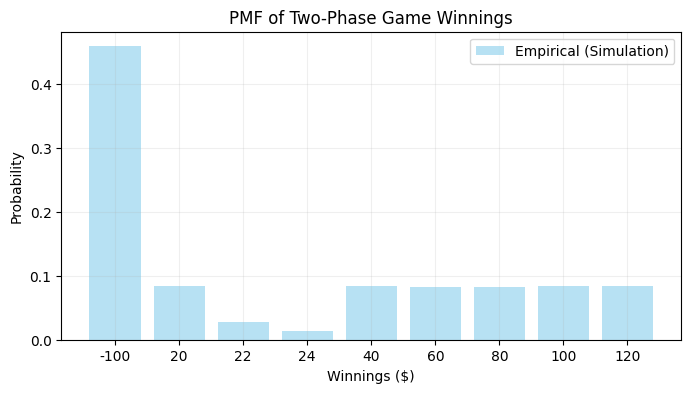

In [23]:
# 🎲 Two-Phase Payoff Simulation
# Goal: Simulate the two-phase game and compute winnings/losses

import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Define parameters
# ----------------------------
n_trials = 1000000  # number of simulations

# Phase 1 (heads): two dice, payoff if sum >= threshold
phase1_multiplier = 2
phase1_threshold = 11
phase1_penalty = -100

# Phase 2 (tails): one die, simple multiplier
phase2_multiplier = 20

# ----------------------------
# Step 2: Run the simulation
# ----------------------------
winnings = []

for _ in range(n_trials):
    # Flip coin
    coin = random.randint(0,1)  # 1=heads, 0=tails
    
    if coin == 1:  # Phase 1
        die1 = random.randint(1,6)
        die2 = random.randint(1,6)
        total = die1 + die2
        if total >= phase1_threshold:
            winnings.append(phase1_multiplier * total)
        else:
            winnings.append(phase1_penalty)
    else:  # Phase 2
        die = random.randint(1,6)
        winnings.append(phase2_multiplier * die)

# ----------------------------
# Step 3: Empirical PMF
# ----------------------------
winnings = np.array(winnings)
unique, counts = np.unique(winnings, return_counts=True)
pmf_empirical = counts / n_trials

# ----------------------------
# Step 4: Empirical Expected Value
# ----------------------------
E_Y_empirical = winnings.mean()

print(f"Empirical Expected Value E[Y] ≈ {E_Y_empirical:.2f}\n")

print("Empirical PMF:")
for val, prob in zip(unique, pmf_empirical):
    print(f"  P(Y = {val}) ≈ {prob:.4f}")

# ----------------------------
# Step 5: Visualization
# ----------------------------
fig, ax = plt.subplots(figsize=(8,4))

# Empirical PMF as bars
ax.bar(unique.astype(str), pmf_empirical, alpha=0.6, color='skyblue', label='Empirical (Simulation)')

ax.set_title("PMF of Two-Phase Game Winnings")
ax.set_xlabel("Winnings ($)")
ax.set_ylabel("Probability")
ax.legend()
ax.grid(alpha=0.2)
plt.show()
